This lesson teaches learners how to perform Multiple Linear Regression using scikit-learn. It also teaches how to assess the model’s accuracy using Residual Analysis. Thank you to the StreetEasy Research team for this dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



### Introduction to Multiple Linear Regression

Linear regression is useful when we want to predict the values of a variable from its relationship with other variables. There are two different types of linear regression models (simple linear regression and multiple linear regression).

In predicting the price of a home, one factor to consider is the size of the home. The relationship between those two variables, price and size, is important, but there are other variables that factor in to pricing a home: location, air quality, demographics, parking, and more. When making predictions for price, our dependent variable, we’ll want to use multiple independent variables. To do this, we’ll use Multiple Linear Regression.

Multiple Linear Regression uses two or more independent variables to predict the values of the dependent variable. It is based on the following equation that we’ll explore later on:  
$$y = b+m_1x_1+m_2x_2+....m_nx_n$$  
When we are looking at relationships, the independent variables are what you change. The dependent variable is what you measure. So, if we are looking at the way soil quality and watering frequency affects the height of a house plant, the independent variables would be:

    Soil quality
    Watering frequency

The dependent variable would be height.

### StreetEasy Dataset
StreetEasy is New York City’s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem.

In this lesson, you will be working with a dataset that contains a sample of 5,000 rentals listings in Manhattan, Brooklyn, and Queens, active on StreetEasy in June 2016.

It has the following columns:

    rental_id: rental ID
    rent: price of rent in dollars
    bedrooms: number of bedrooms
    bathrooms: number of bathrooms
    size_sqft: size in square feet
    min_to_subway: distance from subway station in minutes
    floor: floor number
    building_age_yrs: building’s age in years
    no_fee: does it have a broker fee? (0 for fee, 1 for no fee)
    has_roofdeck: does it have a roof deck? (0 for no, 1 for yes)
    has_washer_dryer: does it have washer/dryer in unit? (0/1)
    has_doorman: does it have a doorman? (0/1)
    has_elevator: does it have an elevator? (0/1)
    has_dishwasher: does it have a dishwasher (0/1)
    has_patio: does it have a patio? (0/1)
    has_gym: does the building have a gym? (0/1)
    neighborhood: (ex: Greenpoint)
    borough: (ex: Brooklyn)

More information about this dataset can be found in the StreetEasy Dataset article.

Let’s start by doing exploratory data analysis to understand the dataset better. We have broken the dataset for you into:

In [2]:
df = pd.read_csv('manhattan.csv')
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


### Training Set vs. Test Set

As with most machine learning algorithms, we have to split our dataset into:

    Training set: the data used to fit the model
    Test set: the data partitioned away at the very start of the experiment (to provide an unbiased evaluation of the model)
<img src = 'https://s3.amazonaws.com/codecademy-content/programs/machine-learning/multiple-linear-regression/split.svg'> 
In general, putting 80% of your data in the training set and 20% of your data in the test set is a good place to start.

Suppose you have some values in x and some values in y:  
<code>
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
</code>
Here are the parameters:

    train_size: the proportion of the dataset to include in the train split (between 0.0 and 1.0)
    test_size: the proportion of the dataset to include in the test split (between 0.0 and 1.0)
    random_state: the seed used by the random number generator [optional]


1. Import train_test_split from sklearn.model_selection.
2. Create a DataFrame x that selects the following columns from the main df DataFrame:

    'bedrooms'  
    'bathrooms'  
    'size_sqft'  
    'min_to_subway'  
    'floor'  
    'building_age_yrs'  
    'no_fee'  
    'has_roofdeck'  
    'has_washer_dryer'  
    'has_doorman'  
    'has_elevator'  
    'has_dishwasher'  
    'has_patio'  
    'has_gym'  

Create a DataFrame y that selects the rent column from the main df DataFrame.  

These are the columns we want to use for our regression model. 
3. Use scikit-learn’s train_test_split() method to split x into 80% training set and 20% testing set and generate:  

    x_train  
    x_test  
    y_train  
    y_test  

Set the random_state to 6.  
4. Let’s take a look at the shapes of x_train, x_test, y_train, and y_test to see we got the proportion we wanted. We have 14 features that we’re looking for for each apartment, and 1 label we’re looking for for each apartment.




In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym' ]]
y = df['rent']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 6)

In [6]:
x_train.shape

(2831, 14)

In [7]:
x_test.shape

(708, 14)

In [8]:
y_train.shape

(2831,)

In [9]:
y_test.shape

(708,)

### Multiple Linear Regression: Scikit-Learn

Now we have the training set and the test set, let’s use scikit-learn to build the linear regression model!

The steps for multiple linear regression in scikit-learn are identical to the steps for simple linear regression. Just like simple linear regression, we need to import LinearRegression from the linear_model module:  
<code>
from sklearn.linear_model import LinearRegression
</code>
Then, create a LinearRegression model, and then fit it to your x_train and y_train data:  
<code>
mlr = LinearRegression()

mlr.fit(x_train, y_train)
#finds the coefficients and the intercept value
</code>
We can also use the .predict() function to pass in x-values. It returns the y-values that this plane would predict:  
<code>
y_predicted = mlr.predict(x_test)
#takes values calculated by `.fit()` and the `x` values, plugs them into the multiple linear regression equation, and calculates the predicted y values.
</code>
We will start by using two of these columns to teach you how to predict the values of the dependent variable, prices.  



1. Import LinearRegression from scikit-learn’s linear_model module.  
2. Create a Linear Regression model and call it mlr. Fit the model using x_train and y_train.
3. Use the model to predict y-values from x_test. Store the predictions in a variable called y_predict. Now we have:

    x_test  
    x_train  
    y_test  
    y_train  
    and y_predict!  
4. To see this model in action, let’s test it on Sonny’s apartment in Greenpoint, Brooklyn! Or if you reside in New York, plug in your own apartment’s values and see if you are over or underpaying!
<code>
#Sonny doesn't have an elevator so the 11th item in the list is a 0
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
predict = mlr.predict(sonny_apartment)
print("Predicted rent: $%.2f" % predict)
The result is:

Predicted rent: $2393.58

And Sonny is only paying $2,000. Yay!
</code>





In [10]:
Sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

In [11]:
Sonny_apartment

[[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

In [12]:
np.array(Sonny_apartment).shape

(1, 14)

In [13]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)
y_pred = mlr.predict(x_test)

In [14]:
predict = mlr.predict(Sonny_apartment)
predict

array([2393.58059075])

In [15]:
np.array(Sonny_apartment).shape # Check the number of columns in both

(1, 14)

In [16]:
x_test.shape

(708, 14)

In [17]:
print("Predicted rent: $%.2f" % predict)

Predicted rent: $2393.58


In [18]:
print("Predicted rent is : {:.2f}".format(predict[0]))

Predicted rent is : 2393.58


In [19]:
type(predict)

numpy.ndarray

### Visualizing Results with Matplotlib

You’ve performed Multiple Linear Regression, and you also have the predictions in y_predict. However, we don’t have insight into the data, yet. In this exercise, you’ll create a 2D scatterplot to see how the independent variables impact prices.

How do you create 2D graphs?

Graphs can be created using Matplotlib’s pyplot module. Here is the code with inline comments explaining how to plot using Matplotlib’s .scatter():

In [20]:
y_test.shape

(708,)

In [21]:
y_pred.shape

(708,)

In [22]:
y_test = y_test.values.reshape(-1,1)

In [23]:
y_test.shape

(708, 1)

In [24]:
y_pred = y_pred.reshape(-1,1)

In [25]:
y_pred.shape

(708, 1)

In [26]:
type(y_pred)

numpy.ndarray

In [27]:
type(y_test)

numpy.ndarray

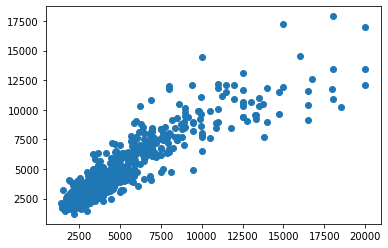

In [28]:
plt.scatter(y_test, y_pred)

Multiple Linear Regression Equation

Now that we have implemented Multiple Linear Regression, we will learn how to tune and evaluate the model. Before we do that, however, it’s essential to learn the equation behind it.

Equation 6.1 The equation for multiple linear regression that uses two independent variables is this:

$$y=b+m_1x_1+m_2x_2$$
Equation 6.2 The equation for multiple linear regression that uses three independent variables is this:

$$y=b+m_1x_1+m_2x_2+m_3x_3$$

Equation 6.3 As a result, since multiple linear regression can use any number of independent variables, its general equation becomes:

$$y=b+m_1x_1+m_2x_2+...+m_nx_n$$

Here, $m_1$, $m_2$, $m_3$, … $m_n$ refer to the coefficients, and b refers to the intercept that you want to find. You can plug these values back into the equation to compute the predicted y values.

Remember, with sklearn‘s LinearRegression() method, we can get these values with ease.

The .fit() method gives the model two variables that are useful to us:

    .coef_, which contains the coefficients
    .intercept_, which contains the intercept

After performing multiple linear regression, you can print the coefficients using .coef_.

Coefficients are most helpful in determining which independent variable carries more weight. For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, with the former impacting prices negatively and latter positively.


In [30]:
mlr.coef_

array([-302.73009383, 1199.3859951 ,    4.79976742,  -24.28993151,
         24.19824177,   -7.58272473, -140.90664773,   48.85017415,
        191.4257324 , -151.11453388,   89.408889  ,  -57.89714551,
        -19.31948556,  -38.92369828])

In [31]:
len(mlr.coef_)

14

In [32]:
mlr.intercept_

-344.6858798633657

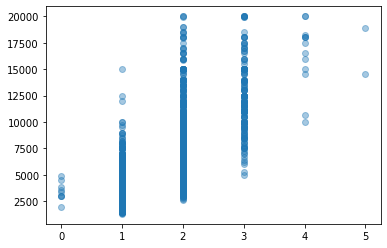

In [36]:
plt.scatter(df[['bathrooms']], df[['rent']], alpha=0.4)

In [37]:
from scipy.stats import pearsonr

In [40]:
data1 = df['bathrooms'].values

In [41]:
data1

array([1, 2, 1, ..., 1, 1, 1])

In [43]:
data2 = df['rent'].values

In [44]:
pearsonr(data1,data2)

(0.7694744080238435, 0.0)

### Correlations

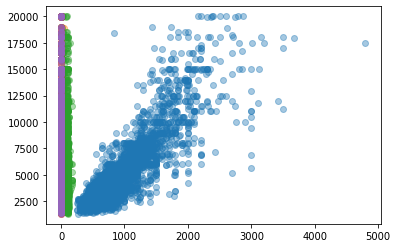

In [45]:
plt.scatter(df[['size_sqft']], df[['rent'
]], alpha = 0.4)
plt.scatter(df[['min_to_subway']], df[['rent'
]], alpha = 0.4)
plt.scatter(df[['building_age_yrs']], df[['rent'
]], alpha = 0.4)
plt.scatter(df[['no_fee']], df[['rent'
]], alpha = 0.4)



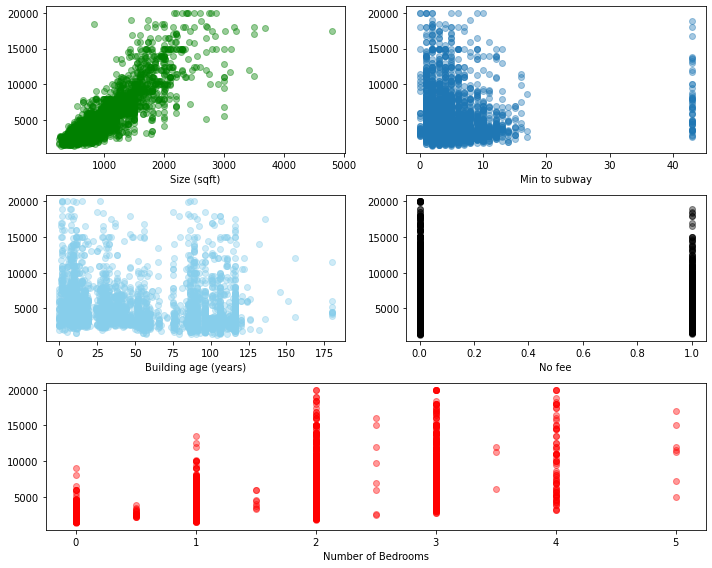

In [102]:
plt.figure(figsize = (10,8),  facecolor = 'white')
plt.subplot(3,2,1)
plt.scatter(df[['size_sqft']], df[['rent']], alpha = 0.4, color = 'green')
plt.xlabel('Size (sqft)')
plt.subplot(3,2,2)

plt.scatter(df[['min_to_subway']], df[['rent'
]], alpha = 0.4)

plt.xlabel('Min to subway')
plt.subplot(3,2,3)
plt.scatter(df[['building_age_yrs']], df[['rent'
]], alpha = 0.4, color = 'skyblue')
plt.xlabel('Building age (years)')
plt.subplot(3,2,4)
plt.scatter(df[['no_fee']], df[['rent'
]], alpha = 0.4, color = 'k')
plt.xlabel('No fee')
plt.subplot(3,1,3)
plt.scatter(df[['bedrooms']], df[['rent'
]], alpha = 0.4, color = 'red')
plt.xlabel('Number of Bedrooms')

plt.tight_layout()

In [103]:
df.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [104]:
pearsonr(df['size_sqft'].values, df['rent'].values) #High correlation

(0.8579536612266578, 0.0)

In [105]:
pearsonr(df['min_to_subway'].values, df['rent'].values) # Low correlation

(0.03516406710980702, 0.03645636732537045)

In [106]:
pearsonr(df['building_age_yrs'].values, df['rent'].values) #Negative correlation

(-0.12889488750787506, 1.3895984012079753e-14)

In [107]:
pearsonr(df['no_fee'].values, df['rent'].values) #Negative correlation

(-0.10149729838002093, 1.4348306656846202e-09)

In [109]:
pearsonr(df['bedrooms'].values, df['rent'].values) #High positive correlation

(0.6383363959944299, 0.0)

## Evaluating the Model's Accuracy

When trying to evaluate the accuracy of our multiple linear regression model, one technique we can use is Residual Analysis.

The difference between the actual value y, and the predicted value ŷ is the residual e. The equation is:
$$e = y-ŷ$$
In the StreetEasy dataset, y is the actual rent and the ŷ is the predicted rent. The real y values should be pretty close to these predicted y values.

sklearn‘s linear_model.LinearRegression comes with a .score() method that returns the coefficient of determination $R^2$ of the prediction.

The coefficient $R^2$ is defined as:$$1-\frac{u}{v}$$  
where u is the residual sum of squares:  
<code>
((y - y_predict) ** 2).sum()
</code>  
and v is the total sum of squares (TSS):  
<code>
((y - y.mean()) ** 2).sum()
</code>
The TSS tells you how much variation there is in the y variable.

$R^2$ is the percentage variation in y explained by all the x variables together.

For example, say we are trying to predict rent based on the size_sqft and the bedrooms in the apartment and the $R^2$ for our model is 0.72 — that means that all the x variables (square feet and number of bedrooms) together explain 72% variation in y (rent).

Now let’s say we add another x variable, building’s age, to our model. By adding this third relevant x variable, the $R^2$ is expected to go up. Let say the new $R^2$ is 0.95. This means that square feet, number of bedrooms and age of the building together explain 95% of the variation in the rent.

The best possible $R^2$ is 1.00 (and it can be negative because the model can be arbitrarily worse). Usually, a $R^2$ of 0.70 is considered good.


Use the .score() method from LinearRegression to find the mean squared error regression loss for the training set.



In [111]:
print("Train score:")
print(mlr.score(x_train, y_train))

Train score:
0.7725460559817883


Use the .score() method from LinearRegression to find the mean squared error regression loss for the testing set.

Write that number down.


In [112]:
print("Test score:")
print(mlr.score(x_test, y_test))

Test score:
0.8050371975357647


If you want to graph a scatter plot of residuals vs. predicted_y values:

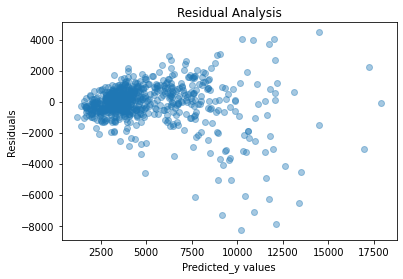

In [117]:
residuals = y_pred - y_test

plt.scatter(y_pred, residuals, alpha=0.4)
plt.title('Residual Analysis')
plt.xlabel('Predicted_y values')
plt.ylabel('Residuals')

plt.show()

### Rebuild the Model

Now let’s rebuild the model using the new features as well as evaluate the new model to see if we improved!

For Manhattan, the scores returned:

Train score: 0.772546055982  
Test score:  0.805037197536

In [118]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

Remove some of the features that don’t have strong correlations and see if your scores improved!

In [119]:
df.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [154]:
listing = []
for i in range(len(df.columns)):
    if (i == 1) | (df.columns[i] == 'neighborhood') | (df.columns[i] == 'borough'):
        continue
    listing.append(df.columns[i])

In [155]:
listing

['rental_id',
 'bedrooms',
 'bathrooms',
 'size_sqft',
 'min_to_subway',
 'floor',
 'building_age_yrs',
 'no_fee',
 'has_roofdeck',
 'has_washer_dryer',
 'has_doorman',
 'has_elevator',
 'has_dishwasher',
 'has_patio',
 'has_gym']

In [156]:
x = df[listing]

In [157]:
x

,rental_id,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,1545,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,2472,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,2919,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,2790,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,3946,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,7582,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1
3535,5686,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1
3536,9679,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0
3537,5188,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1


In [159]:
for i in listing:
    print(i+' vs rent')
    print(pearsonr(df[i].values, df['rent'].values)[0])
    print()


rental_id vs rent
-0.13434657764256672

bedrooms vs rent
0.6383363959944299

bathrooms vs rent
0.7694744080238435

size_sqft vs rent
0.8579536612266578

min_to_subway vs rent
0.03516406710980702

floor vs rent
0.2158671587720904

building_age_yrs vs rent
-0.12889488750787506

no_fee vs rent
-0.10149729838002093

has_roofdeck vs rent
0.0351653050109555

has_washer_dryer vs rent
0.05387317565633485

has_doorman vs rent
0.03130204959623802

has_elevator vs rent
0.051859698813758126

has_dishwasher vs rent
0.05224126000632327

has_patio vs rent
0.029302425388084075

has_gym vs rent
0.04060863088912616



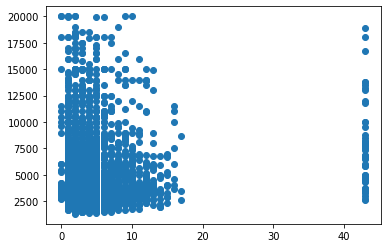

In [160]:
plt.scatter(df['min_to_subway'], df['rent'])

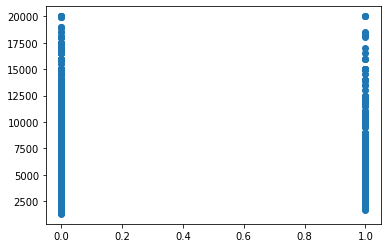

In [161]:
plt.scatter(df['has_roofdeck'], df['rent'])

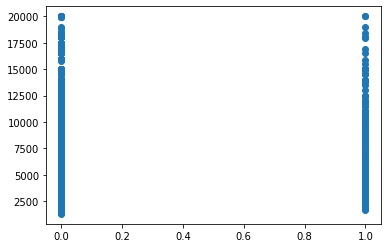

In [184]:
plt.scatter(df['has_washer_dryer'], df['rent'])

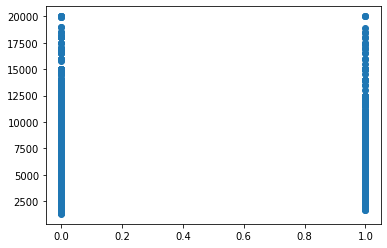

In [163]:
plt.scatter(df['has_doorman'],df['rent'])

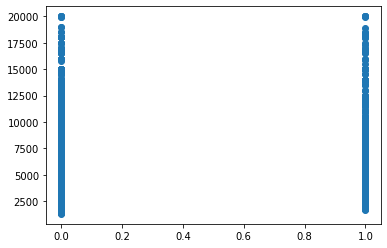

In [164]:
plt.scatter(df['has_elevator'],df['rent'])

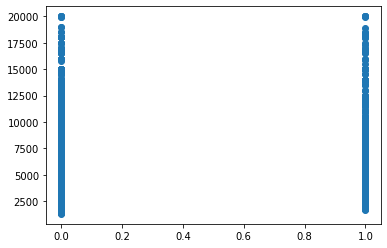

In [165]:
plt.scatter(df['has_elevator'],df['rent'])

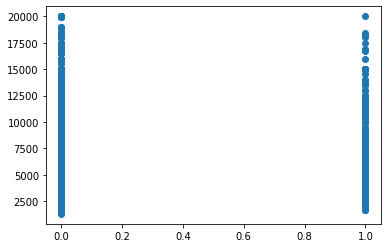

In [166]:

plt.scatter(df['has_dishwasher'],df['rent'])

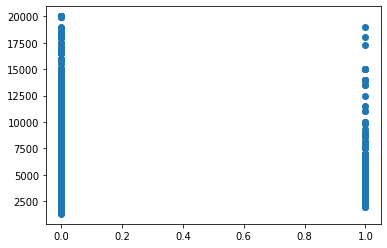

In [167]:
plt.scatter(df['has_patio'],df['rent'])

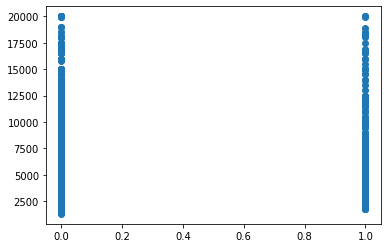

In [169]:
plt.scatter(df['has_gym'],df['rent'])

In [170]:
listing

['rental_id',
 'bedrooms',
 'bathrooms',
 'size_sqft',
 'min_to_subway',
 'floor',
 'building_age_yrs',
 'no_fee',
 'has_roofdeck',
 'has_washer_dryer',
 'has_doorman',
 'has_elevator',
 'has_dishwasher',
 'has_patio',
 'has_gym']

In [171]:
y

0        2550
1       11500
2        4500
3        4795
4       17500
        ...  
3534     4210
3535     6675
3536     1699
3537     3475
3538     4500
Name: rent, Length: 3539, dtype: int64

In [172]:
x = df[['rental_id', 'bedrooms', 'size_sqft', 'floor', 'building_age_yrs', 'no_fee']]

In [173]:
x

,rental_id,bedrooms,size_sqft,floor,building_age_yrs,no_fee
0,1545,0.0,480,2.0,17,1
1,2472,2.0,2000,1.0,96,0
2,2919,1.0,916,51.0,29,0
3,2790,1.0,975,8.0,31,0
4,3946,2.0,4800,4.0,136,0
...,...,...,...,...,...,...
3534,7582,1.0,532,8.0,16,1
3535,5686,2.0,988,10.0,9,1
3536,9679,0.0,250,5.0,96,0
3537,5188,1.0,651,5.0,14,1


In [174]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 6)

In [175]:
x_train.shape

(2831, 6)

In [178]:
lm = LinearRegression()
lm.fit(x_train,y_train)
lm.predict(x_test)


array([ 3141.29158903,  4089.03880201,  4491.62850479,  2649.63991966,
        5062.54128304,  2535.34643414,  4141.39931729,  3467.98392829,
        5334.55948723,  7569.48738575,  8389.02839877,  6501.32632329,
        3275.0292033 , 10750.1827903 ,  4877.16483498,  4298.69585229,
        7885.61579726,  3240.47377373,  2645.99259969,  7077.43198211,
        7821.64244822,  4036.63878642,  1645.96847294,  5335.21143951,
       12243.39833433,  5559.45349277,  4574.5620444 ,  2323.57612873,
        2324.19184443,  5734.76206352,  2019.57372519,  4070.5652818 ,
        2609.61361528,  1871.54853812,  4108.91526116,  4974.9381532 ,
        4634.56680173,  4339.379718  ,  6397.118121  ,  4875.94697969,
        3631.96146348,  9161.6464602 ,  2531.30550042,  3466.86616534,
        9207.38444928,  4202.87049528,  3943.49600939,  5947.81285086,
        4228.72864315,  6012.67937513,  6727.81619022,  2953.0651525 ,
        7292.63583524,  3306.43812301,  3787.1900502 ,  2780.04677234,
      

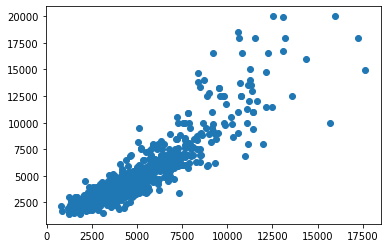

In [180]:
plt.scatter(lm.predict(x_test), y_test)

In [181]:
print("Train score:")
print(lm.score(x_train, y_train))

Train score:
0.7552189624883301


In [183]:
print("Test score:")
print(lm.score(x_test, y_test))

Test score:
0.7976906013275844


In [185]:
tennis = pd.read_csv('tennis_stats.csv')
tennis.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [186]:
tennis.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

In [187]:
cols = [i for i in tennis.columns]

In [189]:
print(cols)

['Player', 'Year', 'FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon', 'SecondServePointsWon', 'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted', 'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved', 'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings', 'Ranking']


In [196]:
x = []
for i in cols:
    if (i == 'Winnings') | (i == 'Player'):
        continue
    x.append(i)

In [197]:
x

['Year',
 'FirstServe',
 'FirstServePointsWon',
 'FirstServeReturnPointsWon',
 'SecondServePointsWon',
 'SecondServeReturnPointsWon',
 'Aces',
 'BreakPointsConverted',
 'BreakPointsFaced',
 'BreakPointsOpportunities',
 'BreakPointsSaved',
 'DoubleFaults',
 'ReturnGamesPlayed',
 'ReturnGamesWon',
 'ReturnPointsWon',
 'ServiceGamesPlayed',
 'ServiceGamesWon',
 'TotalPointsWon',
 'TotalServicePointsWon',
 'Wins',
 'Losses',
 'Ranking']

In [199]:
for i in x:
    print(i, "vs Winnings")
    print(pearsonr(tennis[i].values, tennis['Winnings'].values)[0])
    print()


Year vs Winnings
0.04390805106887372

FirstServe vs Winnings
0.05788214662085266

FirstServePointsWon vs Winnings
0.36112105949290035

FirstServeReturnPointsWon vs Winnings
0.24080834046115276

SecondServePointsWon vs Winnings
0.28121480882884614

SecondServeReturnPointsWon vs Winnings
0.1994012973607895

Aces vs Winnings
0.7984043540699403

BreakPointsConverted vs Winnings
0.0750221883156692

BreakPointsFaced vs Winnings
0.8760356989199047

BreakPointsOpportunities vs Winnings
0.9004439010037777

BreakPointsSaved vs Winnings
0.25827077188659864

DoubleFaults vs Winnings
0.8546851784438939

ReturnGamesPlayed vs Winnings
0.9126126236635087

ReturnGamesWon vs Winnings
0.27964505654930977

ReturnPointsWon vs Winnings
0.2716459071831748

ServiceGamesPlayed vs Winnings
0.912984937841333

ServiceGamesWon vs Winnings
0.39557717398518616

TotalPointsWon vs Winnings
0.46106082878124993

TotalServicePointsWon vs Winnings
0.4077070018393834

Wins vs Winnings
0.9132973207773764

Losses vs Winnings

In [207]:
ly = []
for i in x:
    ly.append((pearsonr(tennis[i].values, tennis['Winnings'].values)[0],i))
    


In [208]:
a = []
a.append((2,3))

In [202]:
a

[(2, 3)]

In [205]:
ly.sort()

In [210]:
ly.sort()

In [211]:
ly

[(-0.35983461266359024, 'Ranking'),
 (0.04390805106887372, 'Year'),
 (0.05788214662085266, 'FirstServe'),
 (0.0750221883156692, 'BreakPointsConverted'),
 (0.1994012973607895, 'SecondServeReturnPointsWon'),
 (0.24080834046115276, 'FirstServeReturnPointsWon'),
 (0.25827077188659864, 'BreakPointsSaved'),
 (0.2716459071831748, 'ReturnPointsWon'),
 (0.27964505654930977, 'ReturnGamesWon'),
 (0.28121480882884614, 'SecondServePointsWon'),
 (0.36112105949290035, 'FirstServePointsWon'),
 (0.39557717398518616, 'ServiceGamesWon'),
 (0.4077070018393834, 'TotalServicePointsWon'),
 (0.46106082878124993, 'TotalPointsWon'),
 (0.7984043540699403, 'Aces'),
 (0.8546851784438939, 'DoubleFaults'),
 (0.8692767614021031, 'Losses'),
 (0.8760356989199047, 'BreakPointsFaced'),
 (0.9004439010037777, 'BreakPointsOpportunities'),
 (0.9126126236635087, 'ReturnGamesPlayed'),
 (0.912984937841333, 'ServiceGamesPlayed'),
 (0.9132973207773764, 'Wins')]

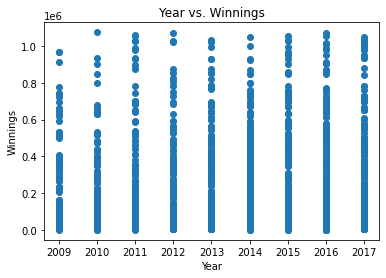

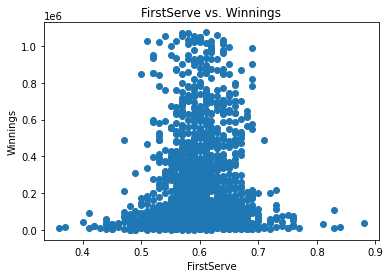

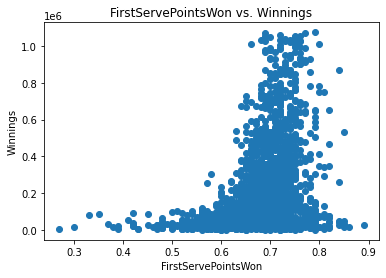

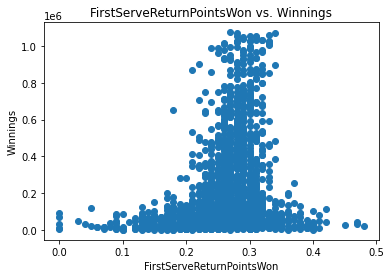

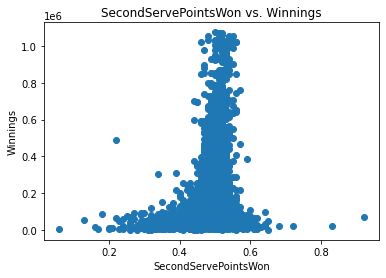

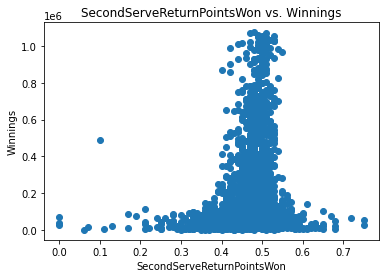

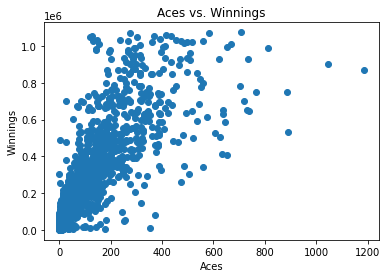

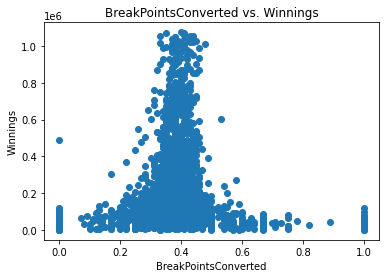

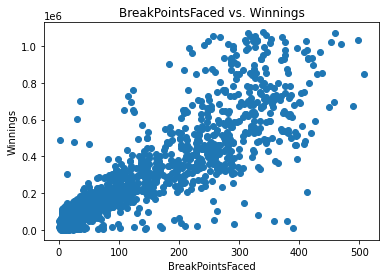

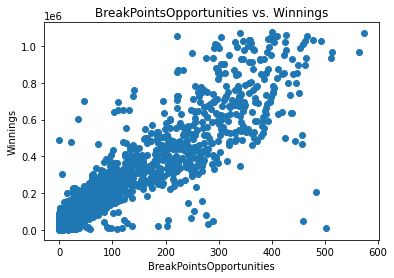

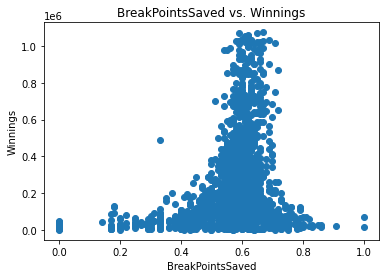

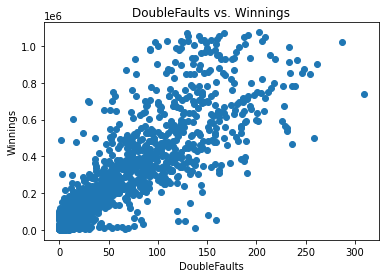

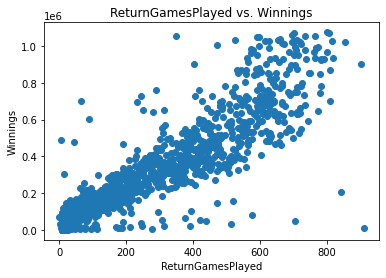

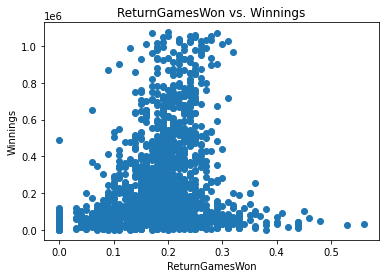

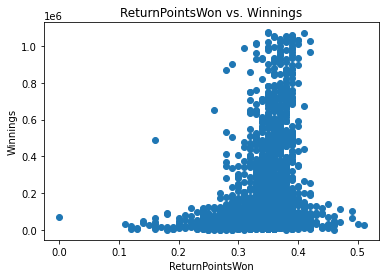

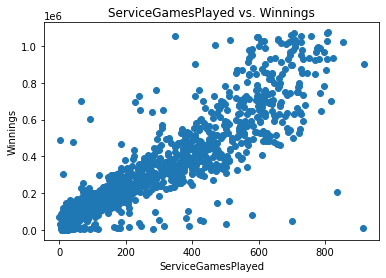

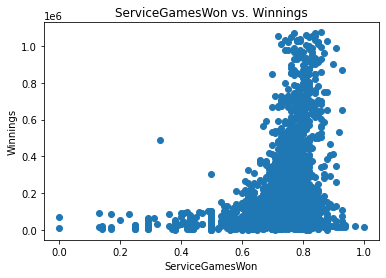

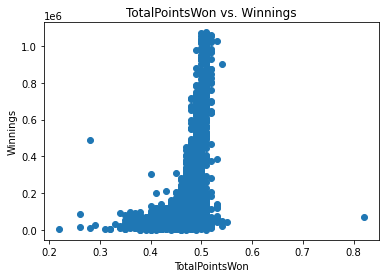

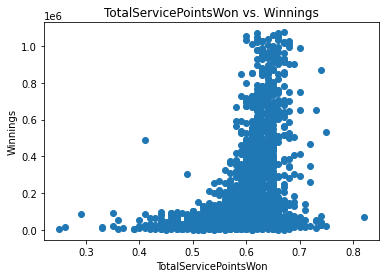

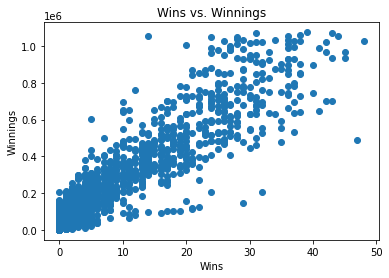

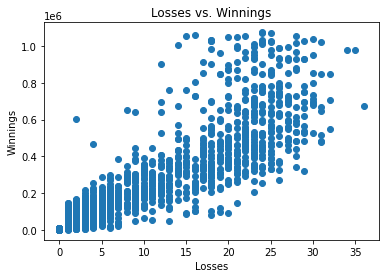

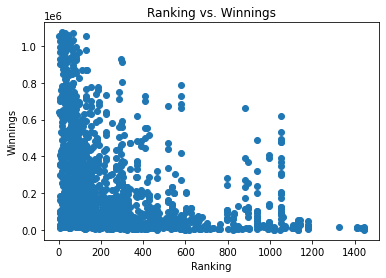

In [213]:
for i in x:
    plt.scatter(tennis[i],tennis['Winnings'])
    plt.xlabel(i)
    plt.ylabel('Winnings')
    plt.title('{} vs. Winnings'.format(i))
    plt.show()

In [214]:
x

['Year',
 'FirstServe',
 'FirstServePointsWon',
 'FirstServeReturnPointsWon',
 'SecondServePointsWon',
 'SecondServeReturnPointsWon',
 'Aces',
 'BreakPointsConverted',
 'BreakPointsFaced',
 'BreakPointsOpportunities',
 'BreakPointsSaved',
 'DoubleFaults',
 'ReturnGamesPlayed',
 'ReturnGamesWon',
 'ReturnPointsWon',
 'ServiceGamesPlayed',
 'ServiceGamesWon',
 'TotalPointsWon',
 'TotalServicePointsWon',
 'Wins',
 'Losses',
 'Ranking']

In [217]:
len(ly)

22

In [218]:
len(x)

22

In [223]:
for i in x:
    x_train, x_test, y_train, y_test = train_test_split(tennis[i].values.reshape(-1,1), tennis['Winnings'].values.reshape(-1,1))
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    print('Train score for predicting Winnings from', i+': ', lr.score(x_train, y_train))
    print('Test score for predicting Winnings from', i+': ', lr.score(x_test, y_test), '\n')
    

Train score for predicting Winnings from Year:  0.0018026797740202662
Test score for predicting Winnings from Year:  -0.002552999149452617 

Train score for predicting Winnings from FirstServe:  0.0028036213403689336
Test score for predicting Winnings from FirstServe:  0.0036395558573795173 

Train score for predicting Winnings from FirstServePointsWon:  0.129853547647929
Test score for predicting Winnings from FirstServePointsWon:  0.13141138402564345 

Train score for predicting Winnings from FirstServeReturnPointsWon:  0.05601022822183721
Test score for predicting Winnings from FirstServeReturnPointsWon:  0.0625749134216893 

Train score for predicting Winnings from SecondServePointsWon:  0.08158915951903789
Test score for predicting Winnings from SecondServePointsWon:  0.07134917734138002 

Train score for predicting Winnings from SecondServeReturnPointsWon:  0.03702107254521647
Test score for predicting Winnings from SecondServeReturnPointsWon:  0.04650727301422286 

Train score f

In [224]:
x

['Year',
 'FirstServe',
 'FirstServePointsWon',
 'FirstServeReturnPointsWon',
 'SecondServePointsWon',
 'SecondServeReturnPointsWon',
 'Aces',
 'BreakPointsConverted',
 'BreakPointsFaced',
 'BreakPointsOpportunities',
 'BreakPointsSaved',
 'DoubleFaults',
 'ReturnGamesPlayed',
 'ReturnGamesWon',
 'ReturnPointsWon',
 'ServiceGamesPlayed',
 'ServiceGamesWon',
 'TotalPointsWon',
 'TotalServicePointsWon',
 'Wins',
 'Losses',
 'Ranking']

In [242]:
x11 = [[i,j] for i in x for j in x1 if i != j]

In [243]:
x11

[['Year', 'FirstServe'],
 ['Year', 'FirstServePointsWon'],
 ['Year', 'FirstServeReturnPointsWon'],
 ['Year', 'SecondServePointsWon'],
 ['Year', 'SecondServeReturnPointsWon'],
 ['Year', 'Aces'],
 ['Year', 'BreakPointsConverted'],
 ['Year', 'BreakPointsFaced'],
 ['Year', 'BreakPointsOpportunities'],
 ['Year', 'BreakPointsSaved'],
 ['Year', 'DoubleFaults'],
 ['Year', 'ReturnGamesPlayed'],
 ['Year', 'ReturnGamesWon'],
 ['Year', 'ReturnPointsWon'],
 ['Year', 'ServiceGamesPlayed'],
 ['Year', 'ServiceGamesWon'],
 ['Year', 'TotalPointsWon'],
 ['Year', 'TotalServicePointsWon'],
 ['Year', 'Wins'],
 ['Year', 'Losses'],
 ['Year', 'Ranking'],
 ['FirstServe', 'Year'],
 ['FirstServe', 'FirstServePointsWon'],
 ['FirstServe', 'FirstServeReturnPointsWon'],
 ['FirstServe', 'SecondServePointsWon'],
 ['FirstServe', 'SecondServeReturnPointsWon'],
 ['FirstServe', 'Aces'],
 ['FirstServe', 'BreakPointsConverted'],
 ['FirstServe', 'BreakPointsFaced'],
 ['FirstServe', 'BreakPointsOpportunities'],
 ['FirstServe',

In [273]:
bb = []
for i in x11:
    x_train, x_test, y_train, y_test = train_test_split(tennis[i], tennis['Winnings'].values.reshape(-1,1))
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    print('Train score for predicting Winnings from '+i[0]+' and '+i[1]+':',lr.score(x_train, y_train))
    print('Test score for predicting Winnings from '+i[0]+' and '+i[1]+':',lr.score(x_test, y_test), '\n')
    bb.append([lr.score(x_train, y_train),lr.score(x_test, y_test), i[0]+' and '+i[1] ])
    
    
    

Train score for predicting Winnings from Year and FirstServe: 0.008486409228020464
Test score for predicting Winnings from Year and FirstServe: -0.027922441440350942 

Train score for predicting Winnings from Year and FirstServePointsWon: 0.13597086705063577
Test score for predicting Winnings from Year and FirstServePointsWon: 0.11828512811973578 

Train score for predicting Winnings from Year and FirstServeReturnPointsWon: 0.06296415598081917
Test score for predicting Winnings from Year and FirstServeReturnPointsWon: 0.05841520461665972 

Train score for predicting Winnings from Year and SecondServePointsWon: 0.07538206537677294
Test score for predicting Winnings from Year and SecondServePointsWon: 0.09689697828066346 

Train score for predicting Winnings from Year and SecondServeReturnPointsWon: 0.0474119997735547
Test score for predicting Winnings from Year and SecondServeReturnPointsWon: 0.01960788912673006 

Train score for predicting Winnings from Year and Aces: 0.656231454731702

Train score for predicting Winnings from FirstServeReturnPointsWon and Aces: 0.6656347404128853
Test score for predicting Winnings from FirstServeReturnPointsWon and Aces: 0.6217345284258666 

Train score for predicting Winnings from FirstServeReturnPointsWon and BreakPointsConverted: 0.05919014264928079
Test score for predicting Winnings from FirstServeReturnPointsWon and BreakPointsConverted: 0.05410777990369109 

Train score for predicting Winnings from FirstServeReturnPointsWon and BreakPointsFaced: 0.7623586463012928
Test score for predicting Winnings from FirstServeReturnPointsWon and BreakPointsFaced: 0.7837514743576042 

Train score for predicting Winnings from FirstServeReturnPointsWon and BreakPointsOpportunities: 0.8024830106854095
Test score for predicting Winnings from FirstServeReturnPointsWon and BreakPointsOpportunities: 0.8396349168478602 

Train score for predicting Winnings from FirstServeReturnPointsWon and BreakPointsSaved: 0.11828578514044476
Test score for predic

Train score for predicting Winnings from Aces and BreakPointsSaved: 0.6588800761200937
Test score for predicting Winnings from Aces and BreakPointsSaved: 0.578296545996343 

Train score for predicting Winnings from Aces and DoubleFaults: 0.7684186821271972
Test score for predicting Winnings from Aces and DoubleFaults: 0.733225313251943 

Train score for predicting Winnings from Aces and ReturnGamesPlayed: 0.8341614658041576
Test score for predicting Winnings from Aces and ReturnGamesPlayed: 0.8297007625161845 

Train score for predicting Winnings from Aces and ReturnGamesWon: 0.6737554132426822
Test score for predicting Winnings from Aces and ReturnGamesWon: 0.6424474968734011 

Train score for predicting Winnings from Aces and ReturnPointsWon: 0.6618776441698826
Test score for predicting Winnings from Aces and ReturnPointsWon: 0.6690192225415713 

Train score for predicting Winnings from Aces and ServiceGamesPlayed: 0.8263059737985026
Test score for predicting Winnings from Aces and S

Train score for predicting Winnings from BreakPointsOpportunities and ServiceGamesWon: 0.8042431433239524
Test score for predicting Winnings from BreakPointsOpportunities and ServiceGamesWon: 0.8473706353341618 

Train score for predicting Winnings from BreakPointsOpportunities and TotalPointsWon: 0.8103886334171648
Test score for predicting Winnings from BreakPointsOpportunities and TotalPointsWon: 0.8114032264141487 

Train score for predicting Winnings from BreakPointsOpportunities and TotalServicePointsWon: 0.820113681583062
Test score for predicting Winnings from BreakPointsOpportunities and TotalServicePointsWon: 0.8036282891258882 

Train score for predicting Winnings from BreakPointsOpportunities and Wins: 0.8514946749359429
Test score for predicting Winnings from BreakPointsOpportunities and Wins: 0.8696556195544887 

Train score for predicting Winnings from BreakPointsOpportunities and Losses: 0.8286715749044223
Test score for predicting Winnings from BreakPointsOpportunities

Train score for predicting Winnings from ReturnGamesPlayed and ServiceGamesWon: 0.8421355149181142
Test score for predicting Winnings from ReturnGamesPlayed and ServiceGamesWon: 0.7831542322928948 

Train score for predicting Winnings from ReturnGamesPlayed and TotalPointsWon: 0.82355942693373
Test score for predicting Winnings from ReturnGamesPlayed and TotalPointsWon: 0.8547750169036137 

Train score for predicting Winnings from ReturnGamesPlayed and TotalServicePointsWon: 0.8315236618456987
Test score for predicting Winnings from ReturnGamesPlayed and TotalServicePointsWon: 0.8374922509259494 

Train score for predicting Winnings from ReturnGamesPlayed and Wins: 0.8629700474058741
Test score for predicting Winnings from ReturnGamesPlayed and Wins: 0.864995926606427 

Train score for predicting Winnings from ReturnGamesPlayed and Losses: 0.8444377417070991
Test score for predicting Winnings from ReturnGamesPlayed and Losses: 0.8025729457758705 

Train score for predicting Winnings fr

Train score for predicting Winnings from ServiceGamesWon and Year: 0.15786257792372171
Test score for predicting Winnings from ServiceGamesWon and Year: 0.15976906764111665 

Train score for predicting Winnings from ServiceGamesWon and FirstServe: 0.15585385150809694
Test score for predicting Winnings from ServiceGamesWon and FirstServe: 0.1559640205096704 

Train score for predicting Winnings from ServiceGamesWon and FirstServePointsWon: 0.15152430871846578
Test score for predicting Winnings from ServiceGamesWon and FirstServePointsWon: 0.19112820881168047 

Train score for predicting Winnings from ServiceGamesWon and FirstServeReturnPointsWon: 0.2016347110130804
Test score for predicting Winnings from ServiceGamesWon and FirstServeReturnPointsWon: 0.18935812192588675 

Train score for predicting Winnings from ServiceGamesWon and SecondServePointsWon: 0.1533901297413598
Test score for predicting Winnings from ServiceGamesWon and SecondServePointsWon: 0.15919601936023808 

Train score 

Train score for predicting Winnings from Wins and BreakPointsConverted: 0.833018768317956
Test score for predicting Winnings from Wins and BreakPointsConverted: 0.8369007699599006 

Train score for predicting Winnings from Wins and BreakPointsFaced: 0.8572329235281398
Test score for predicting Winnings from Wins and BreakPointsFaced: 0.8516534968428014 

Train score for predicting Winnings from Wins and BreakPointsOpportunities: 0.864179967183657
Test score for predicting Winnings from Wins and BreakPointsOpportunities: 0.8275552155831983 

Train score for predicting Winnings from Wins and BreakPointsSaved: 0.8440997242726394
Test score for predicting Winnings from Wins and BreakPointsSaved: 0.8092835319453202 

Train score for predicting Winnings from Wins and DoubleFaults: 0.8558132491594319
Test score for predicting Winnings from Wins and DoubleFaults: 0.8600363101919073 

Train score for predicting Winnings from Wins and ReturnGamesPlayed: 0.8720463264093352
Test score for predicti

In [264]:
aa=ly[0]

In [266]:
aa[1]

'Ranking'

In [267]:
ly[0][1]

'Ranking'

In [274]:
bb

[[0.008486409228020464, -0.027922441440350942, 'Year and FirstServe'],
 [0.13597086705063577, 0.11828512811973578, 'Year and FirstServePointsWon'],
 [0.06296415598081917,
  0.05841520461665972,
  'Year and FirstServeReturnPointsWon'],
 [0.07538206537677294, 0.09689697828066346, 'Year and SecondServePointsWon'],
 [0.0474119997735547,
  0.01960788912673006,
  'Year and SecondServeReturnPointsWon'],
 [0.6562314547317023, 0.649029591629158, 'Year and Aces'],
 [0.004171210957422011, 0.011844267217062332, 'Year and BreakPointsConverted'],
 [0.7776029745416684, 0.8087960643126818, 'Year and BreakPointsFaced'],
 [0.8435212791322475, 0.8009358757333362, 'Year and BreakPointsOpportunities'],
 [0.06662102637067158, 0.07285533034008884, 'Year and BreakPointsSaved'],
 [0.7484332042822681, 0.7224486694622207, 'Year and DoubleFaults'],
 [0.8619043868325887, 0.8273045527891363, 'Year and ReturnGamesPlayed'],
 [0.09473564374886656, 0.022567093089784662, 'Year and ReturnGamesWon'],
 [0.0779561617414205,

In [275]:
print(bb)

[[0.008486409228020464, -0.027922441440350942, 'Year and FirstServe'], [0.13597086705063577, 0.11828512811973578, 'Year and FirstServePointsWon'], [0.06296415598081917, 0.05841520461665972, 'Year and FirstServeReturnPointsWon'], [0.07538206537677294, 0.09689697828066346, 'Year and SecondServePointsWon'], [0.0474119997735547, 0.01960788912673006, 'Year and SecondServeReturnPointsWon'], [0.6562314547317023, 0.649029591629158, 'Year and Aces'], [0.004171210957422011, 0.011844267217062332, 'Year and BreakPointsConverted'], [0.7776029745416684, 0.8087960643126818, 'Year and BreakPointsFaced'], [0.8435212791322475, 0.8009358757333362, 'Year and BreakPointsOpportunities'], [0.06662102637067158, 0.07285533034008884, 'Year and BreakPointsSaved'], [0.7484332042822681, 0.7224486694622207, 'Year and DoubleFaults'], [0.8619043868325887, 0.8273045527891363, 'Year and ReturnGamesPlayed'], [0.09473564374886656, 0.022567093089784662, 'Year and ReturnGamesWon'], [0.0779561617414205, 0.0777453966283067, 

In [276]:
bb.sort()

In [277]:
bb

[[0.004171210957422011, 0.011844267217062332, 'Year and BreakPointsConverted'],
 [0.008140573566175813,
  0.0074972846300543905,
  'BreakPointsConverted and Year'],
 [0.008308159857454256, -0.009318114516143394, 'FirstServe and Year'],
 [0.008486409228020464, -0.027922441440350942, 'Year and FirstServe'],
 [0.013269712146052328,
  -0.008682213026182328,
  'BreakPointsConverted and FirstServe'],
 [0.013845146048976464,
  -0.011020500849820536,
  'FirstServe and BreakPointsConverted'],
 [0.03800816842356314,
  0.05714868988678002,
  'SecondServeReturnPointsWon and FirstServe'],
 [0.039051527788733664,
  0.03142449584186169,
  'BreakPointsConverted and SecondServeReturnPointsWon'],
 [0.04070977889339111,
  0.03987635601989392,
  'SecondServeReturnPointsWon and Year'],
 [0.04135092081097469,
  0.03526395040065333,
  'SecondServeReturnPointsWon and BreakPointsConverted'],
 [0.041734184365939675,
  0.045976047937349336,
  'FirstServe and SecondServeReturnPointsWon'],
 [0.0474119997735547,
  

In [278]:
cc = []
for i in range(len(ly)):
    cc.append(ly[i][1])

In [281]:
cc = cc[4:]

In [280]:
ly

[(-0.35983461266359024, 'Ranking'),
 (0.04390805106887372, 'Year'),
 (0.05788214662085266, 'FirstServe'),
 (0.0750221883156692, 'BreakPointsConverted'),
 (0.1994012973607895, 'SecondServeReturnPointsWon'),
 (0.24080834046115276, 'FirstServeReturnPointsWon'),
 (0.25827077188659864, 'BreakPointsSaved'),
 (0.2716459071831748, 'ReturnPointsWon'),
 (0.27964505654930977, 'ReturnGamesWon'),
 (0.28121480882884614, 'SecondServePointsWon'),
 (0.36112105949290035, 'FirstServePointsWon'),
 (0.39557717398518616, 'ServiceGamesWon'),
 (0.4077070018393834, 'TotalServicePointsWon'),
 (0.46106082878124993, 'TotalPointsWon'),
 (0.7984043540699403, 'Aces'),
 (0.8546851784438939, 'DoubleFaults'),
 (0.8692767614021031, 'Losses'),
 (0.8760356989199047, 'BreakPointsFaced'),
 (0.9004439010037777, 'BreakPointsOpportunities'),
 (0.9126126236635087, 'ReturnGamesPlayed'),
 (0.912984937841333, 'ServiceGamesPlayed'),
 (0.9132973207773764, 'Wins')]

In [282]:
cc

['SecondServeReturnPointsWon',
 'FirstServeReturnPointsWon',
 'BreakPointsSaved',
 'ReturnPointsWon',
 'ReturnGamesWon',
 'SecondServePointsWon',
 'FirstServePointsWon',
 'ServiceGamesWon',
 'TotalServicePointsWon',
 'TotalPointsWon',
 'Aces',
 'DoubleFaults',
 'Losses',
 'BreakPointsFaced',
 'BreakPointsOpportunities',
 'ReturnGamesPlayed',
 'ServiceGamesPlayed',
 'Wins']

0.8681664641892912
0.8708762356094334


Text(0.5, 1.0, 'Actual Winning amount vs Predicted Winning amount')

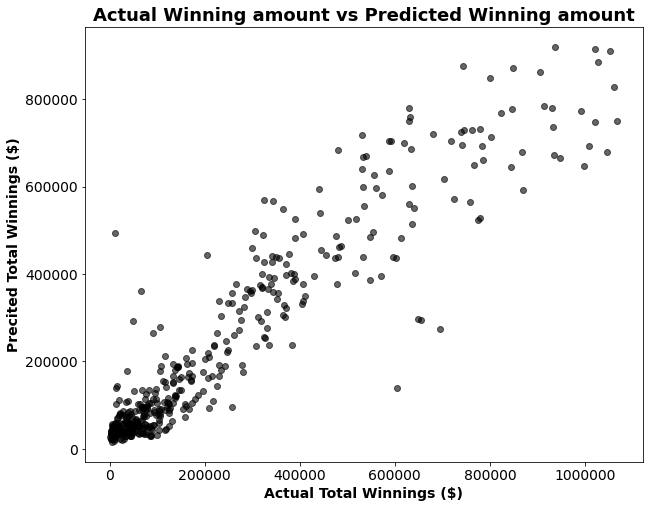

In [311]:
x_train, x_test, y_train, y_test = train_test_split(tennis[cc], tennis['Winnings'].values.reshape(-1,1))
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_pred = mlr.predict(x_test)
print(mlr.score(x_train, y_train))
print(mlr.score(x_test, y_test))
plt.figure(figsize = (10,8))
plt.scatter(y_test, y_pred, alpha = 0.6, color = 'k')

plt.xlabel('Actual Total Winnings ($)', fontsize = 14, fontweight = 'bold')
plt.ylabel('Precited Total Winnings ($)', fontsize = 14, fontweight = 'bold')
plt.ticklabel_format(style = 'plain')
plt.tick_params(labelsize = 14)
plt.title('Actual Winning amount vs Predicted Winning amount', fontsize = '18', fontweight= 'bold')

In [286]:
tennis.corr()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
Year,1.000000,0.051406,-0.016728,-0.106784,0.005300,-0.039087,-0.108367,-0.072404,-0.101735,-0.114806,...,-0.073256,-0.078229,-0.108477,-0.008930,-0.041790,-0.005544,-0.108235,-0.077181,0.043908,-0.040483
FirstServe,0.051406,1.000000,-0.070659,0.025488,0.101417,-0.001924,0.048149,-0.018877,0.057709,0.062345,...,-0.010676,0.004189,0.071920,0.137473,0.148349,0.180996,0.064832,0.053736,0.057882,-0.068759
FirstServePointsWon,-0.016728,-0.070659,1.000000,0.021729,0.320765,-0.004724,0.460323,-0.041538,0.301925,0.324853,...,-0.010193,-0.002793,0.376460,0.817829,0.648753,0.860033,0.356702,0.330581,0.361121,-0.150004
FirstServeReturnPointsWon,-0.106784,0.025488,0.021729,1.000000,0.072707,0.301265,0.140165,0.324057,0.295724,0.313338,...,0.757435,0.834267,0.261206,0.091319,0.496682,0.052335,0.256029,0.243278,0.240808,-0.178664
SecondServePointsWon,0.005300,0.101417,0.320765,0.072707,1.000000,0.103584,0.266269,0.052755,0.258691,0.277782,...,0.096622,0.095585,0.296809,0.650764,0.622673,0.713076,0.268979,0.250918,0.281215,-0.181013
SecondServeReturnPointsWon,-0.039087,-0.001924,-0.004724,0.301265,0.103584,1.000000,0.095494,0.264413,0.234212,0.249583,...,0.603755,0.727338,0.209521,0.096553,0.408975,0.055004,0.193093,0.185217,0.199401,-0.159592
Aces,-0.108367,0.048149,0.460323,0.140165,0.266269,0.095494,1.000000,0.037188,0.757405,0.784934,...,0.139987,0.138023,0.866138,0.440922,0.428679,0.472101,0.825301,0.768628,0.798404,-0.277811
BreakPointsConverted,-0.072404,-0.018877,-0.041538,0.324057,0.052755,0.264413,0.037188,1.000000,0.096368,0.086502,...,0.561759,0.387170,0.083182,-0.025670,0.255050,-0.007254,0.076989,0.062297,0.075022,-0.051005
BreakPointsFaced,-0.101735,0.057709,0.301925,0.295724,0.258691,0.234212,0.757405,0.096368,1.000000,0.973352,...,0.335205,0.331043,0.971296,0.354012,0.463110,0.354005,0.883470,0.943309,0.876036,-0.322082
BreakPointsOpportunities,-0.114806,0.062345,0.324853,0.313338,0.277782,0.249583,0.784934,0.086502,0.973352,1.000000,...,0.358483,0.352783,0.978278,0.372271,0.491198,0.380716,0.923453,0.909295,0.900444,-0.334548
